In [4]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 학습 모델 저장을 위한 라이브러리
import pickle

# 결측치 시각화를 위한 라이브러리
import missingno

In [5]:
# 병합한 채널정보 파일을 불러온다.
df1 = pd.read_csv('open/train/2018_train_채널정보_segment병합.csv')
df1

,기준년월,ID,인입횟수_ARS_R6M,이용메뉴건수_ARS_R6M,인입일수_ARS_R6M,인입월수_ARS_R6M,인입후경과월_ARS,인입횟수_ARS_B0M,이용메뉴건수_ARS_B0M,인입일수_ARS_B0M,...,당사PAY_방문월수_R6M,당사멤버쉽_방문횟수_B0M,당사멤버쉽_방문횟수_R6M,당사멤버쉽_방문월수_R6M,OS구분코드,홈페이지_금융건수_R6M,홈페이지_선결제건수_R6M,홈페이지_금융건수_R3M,홈페이지_선결제건수_R3M,Segment
0,201807,TRAIN_000000,10회 이상,10회 이상,8,6,0,2,6,2,...,0,22,221,6,Android,0,0,0,0,D
1,201807,TRAIN_000001,1회 이상,1회 이상,0,0,0,0,0,0,...,0,0,0,0,NaN,0,0,0,0,E
2,201807,TRAIN_000002,1회 이상,1회 이상,1,1,0,2,5,1,...,0,0,0,0,Android,11,6,5,5,C
3,201807,TRAIN_000003,10회 이상,10회 이상,10,6,0,2,6,2,...,0,23,219,6,Android,0,0,0,0,D
4,201807,TRAIN_000004,1회 이상,1회 이상,0,0,0,0,0,0,...,0,0,0,0,Android,0,0,0,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,1회 이상,1회 이상,0,0,0,0,0,0,...,0,0,0,0,NaN,0,0,0,0,E
2399996,201812,TRAIN_399996,1회 이상,1회 이상,0,0,0,0,0,0,...,0,0,0,1,NaN,0,0,0,0,D
2399997,201812,TRAIN_399997,1회 이상,1회 이상,0,0,0,0,0,0,...,0,0,0,0,NaN,0,0,0,0,C
2399998,201812,TRAIN_399998,1회 이상,1회 이상,0,0,0,0,0,0,...,0,0,0,0,NaN,0,0,0,0,E


## 불만

In [18]:
pd.options.display.float_format = '{:.5f}'.format
# 1. 분석 대상 컬럼 리스트 (컨택건수 관련 전체)
complain_columns = [
    "불만제기건수_B0M",
    "불만제기건수_R12M",
    "불만제기후경과월_R12M"
]
# 2. Segment 필터링
df1_seg = df1[df1["Segment"].isin(["A", "B", "C", "D", "E"])]

# 3. 평균값 계산
complain_columns_mean = df1_seg.groupby("Segment")[complain_columns].mean().T

# B0M, R6M 컬럼명 분리
complain_columns_B0M = [col for col in complain_columns if "_B0M" in col]
complain_columns_R12M = [col for col in complain_columns if "_R12M" in col]

# 정리된 평균값에서 해당 컬럼만 출력
display(complain_columns_mean.loc[complain_columns_B0M])
display(complain_columns_mean.loc[complain_columns_R12M])

Segment,A,B,C,D,E
불만제기건수_B0M,0.00000,0.00000,0.00000,0.00000,0.00000


Segment,A,B,C,D,E
불만제기건수_R12M,0.00000,0.00000,0.00000,0.00000,0.00000
불만제기후경과월_R12M,10.14815,10.00000,9.23771,8.49114,6.04128


In [16]:
# 다 수치형이다. 위 값에 오류없음
df1[complain_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 3 columns):
 #   Column         Dtype
---  ------         -----
 0   불만제기건수_B0M     int64
 1   불만제기건수_R12M    int64
 2   불만제기후경과월_R12M  int64
dtypes: int64(3)
memory usage: 54.9 MB


### 개별 컬럼 확인용

In [20]:
df1['불만제기후경과월_R12M'].value_counts().sort_index()

불만제기후경과월_R12M
0     1086078
12    1313922
Name: count, dtype: int64

In [22]:
# 세그먼트별 '컬럼' 값 분포 확인
tm_contact_dist = (
    df1.groupby("Segment")["불만제기후경과월_R12M"]
    .value_counts()
    .sort_index()  # 값 기준 정렬
    .unstack(fill_value=0)  # 보기 좋게 pivot
)

# 결과 출력
display(tm_contact_dist)

# Segment별 비율 테이블 (열 기준 normalize)
tm_contact_ratio = tm_contact_dist.div(tm_contact_dist.sum(axis=1), axis=0)
display(tm_contact_ratio)

불만제기후경과월_R12M,0,12
Segment,,
A,150,822
B,24,120
C,29370,98220
D,102120,247122
E,954414,967638


불만제기후경과월_R12M,0,12
Segment,,
A,0.15432,0.84568
B,0.16667,0.83333
C,0.23019,0.76981
D,0.29240,0.70760
E,0.49656,0.50344


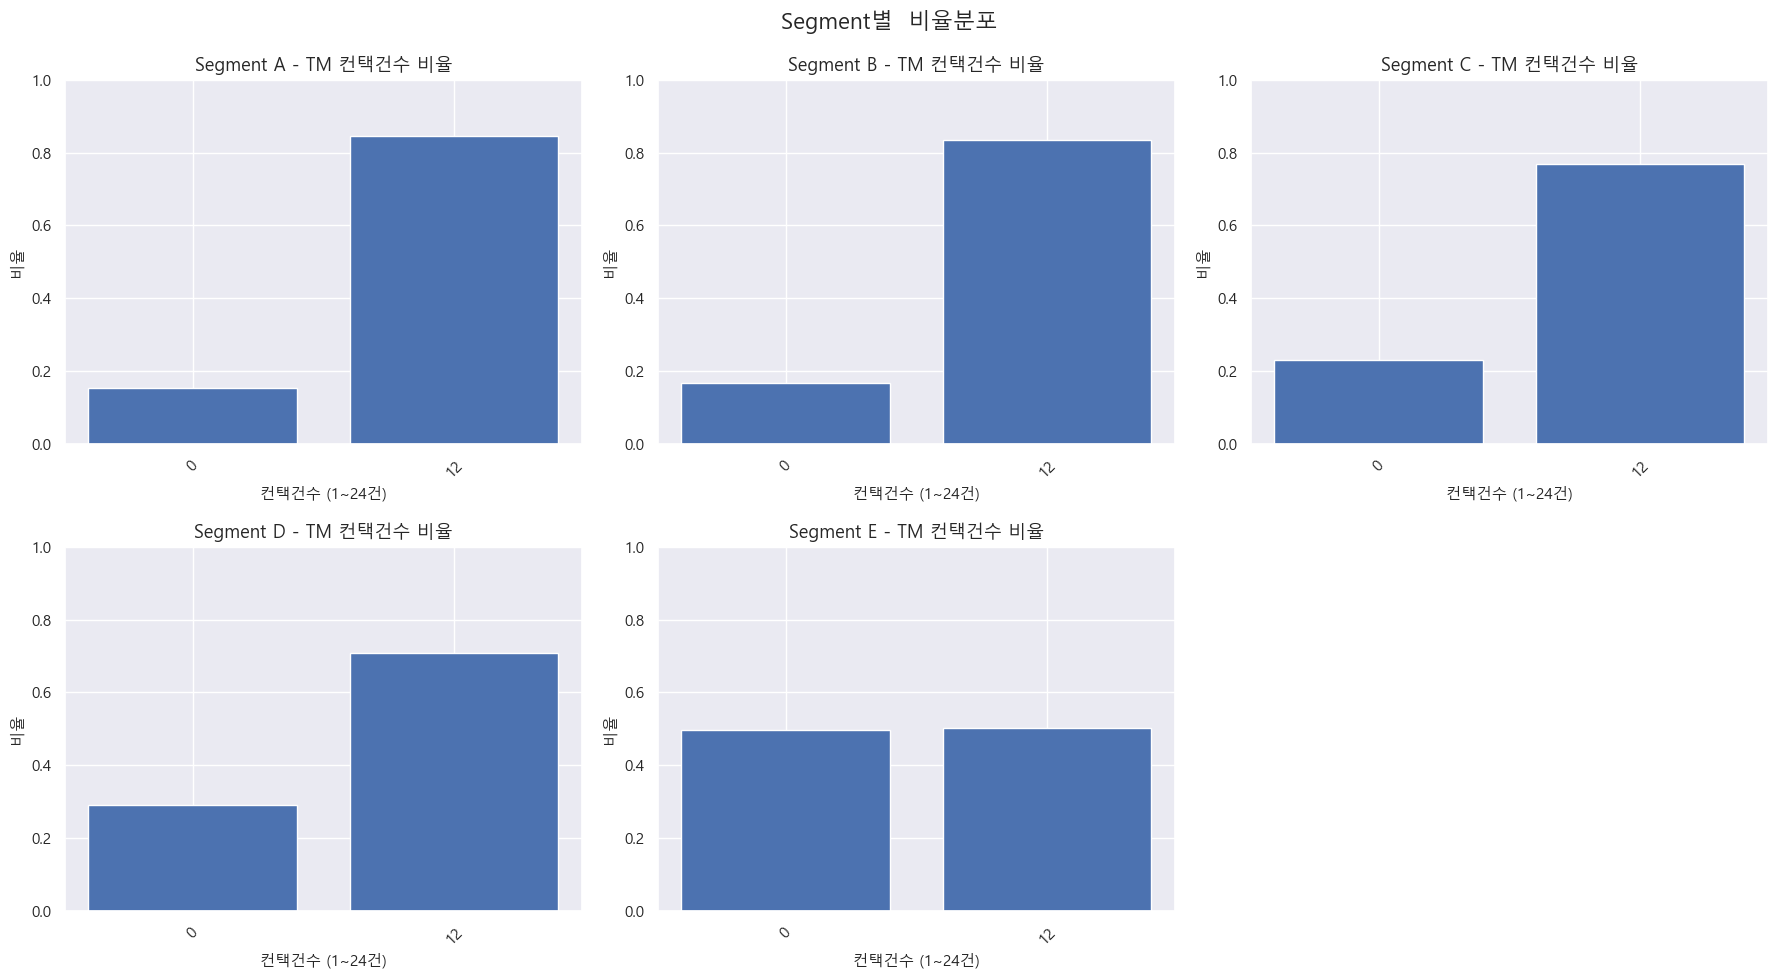

In [24]:
# 보고 싶은 범위 설정하면됨
tm_contact_ratio_range = tm_contact_ratio.loc[:, 0:63]

# 막대그래프 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

segments = tm_contact_ratio_range.index.tolist()

for i, seg in enumerate(segments):
    axes[i].bar(tm_contact_ratio_range.columns.astype(str), tm_contact_ratio_range.loc[seg])
    axes[i].set_title(f"Segment {seg} - TM 컨택건수 비율", fontsize=13)
    axes[i].set_xlabel("컨택건수 (1~24건)", fontsize=11)
    axes[i].set_ylabel("비율", fontsize=11)
    axes[i].set_ylim(0, 1)  # Y축 고정
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, axis='y')

# 빈 subplot 제거 (6번째)
fig.delaxes(axes[-1])

# 전체 타이틀
fig.suptitle("Segment별  비율분포", fontsize=16)
plt.tight_layout()
plt.show()


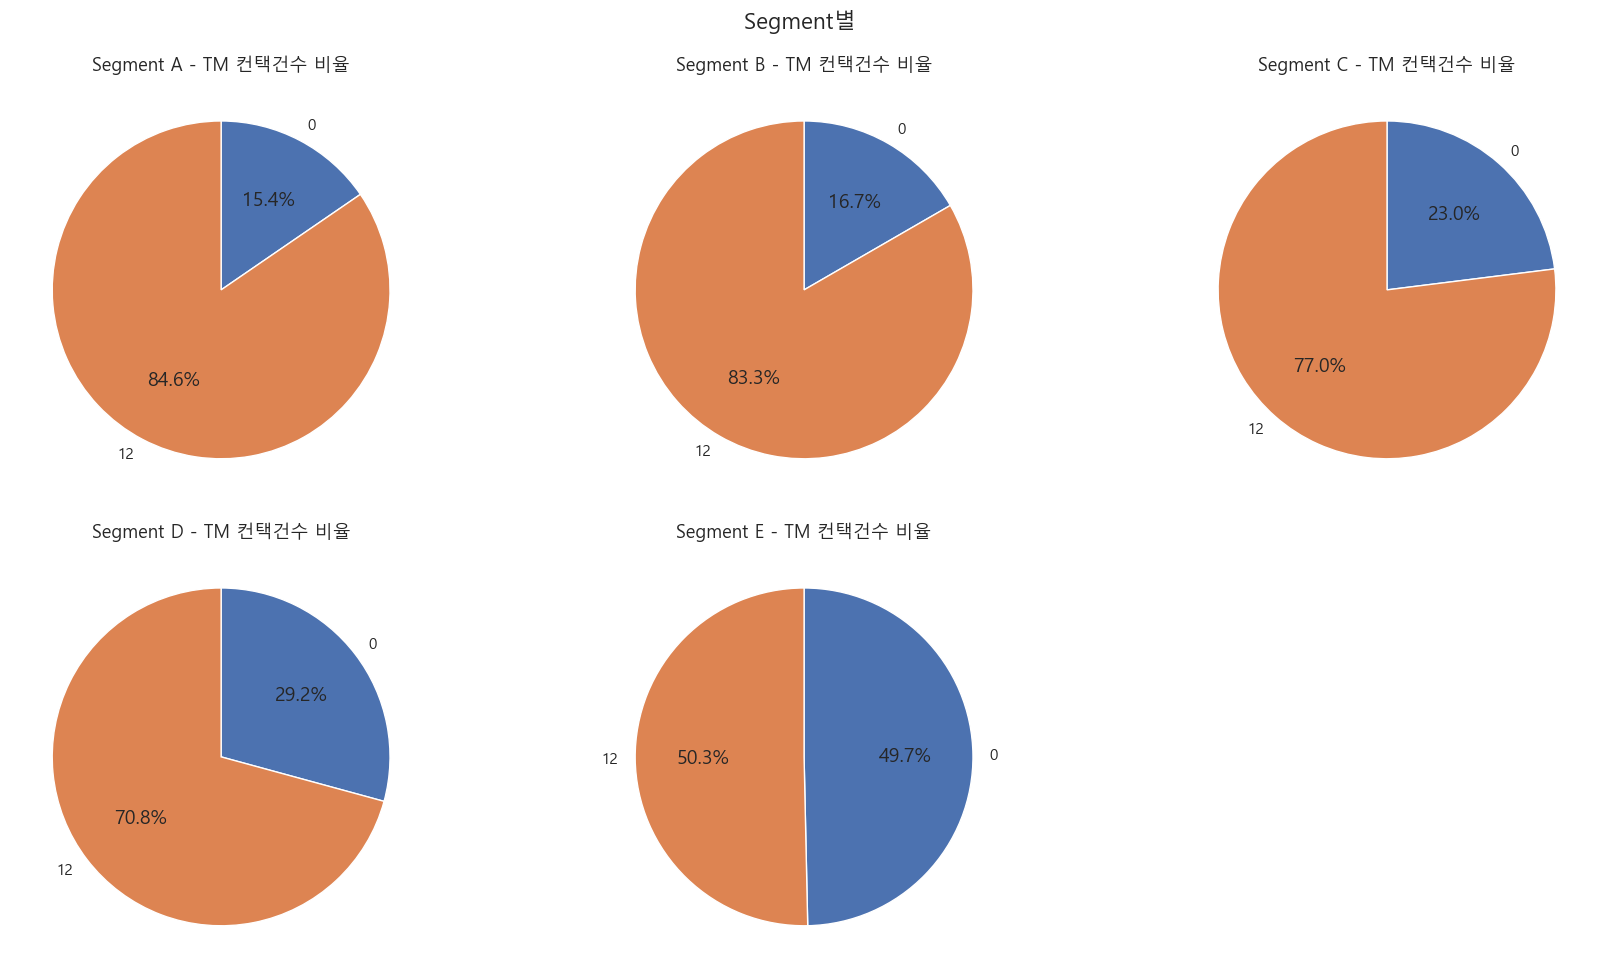

In [25]:
# 0건 제외한 1~16건 컬럼만 추출
tm_contact_ratio_range = tm_contact_ratio.loc[:, 0:63]

# 파이차트 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

segments = tm_contact_ratio_range.index.tolist()

for i, seg in enumerate(segments):
    data = tm_contact_ratio_range.loc[seg]
    axes[i].pie(
        data,
        labels=data.index.astype(str),
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False
    )
    axes[i].set_title(f"Segment {seg} - TM 컨택건수 비율", fontsize=13)

# 빈 subplot 제거 (6번째)
fig.delaxes(axes[-1])

# 전체 타이틀
fig.suptitle("Segment별 ", fontsize=16)
plt.tight_layout()
plt.show()


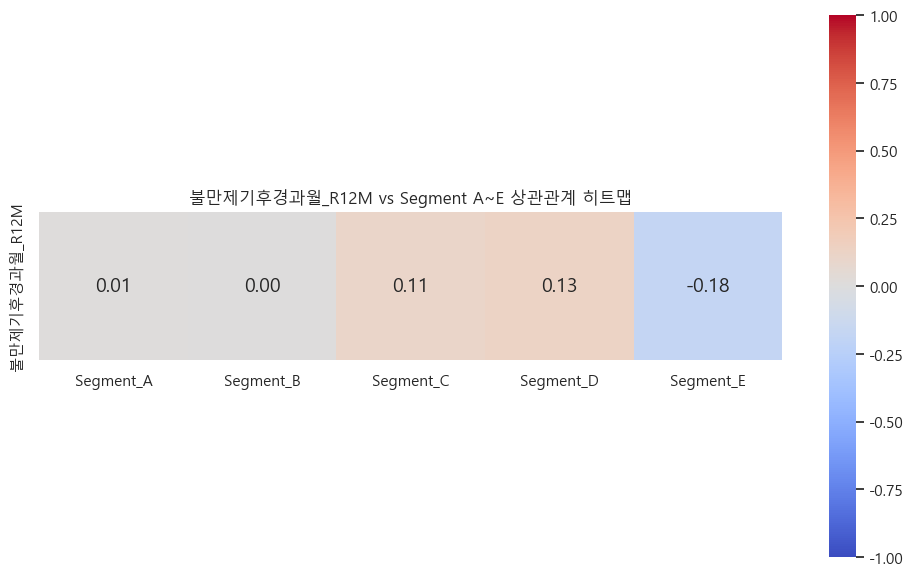

In [26]:
# 컨택건수_채권 관련 수치형 컬럼 리스트
bond_columns = [
    "불만제기후경과월_R12M"
]

# Segment를 원-핫 인코딩
segment_dummies = pd.get_dummies(df1["Segment"], prefix="Segment")

# 인코딩된 세그먼트와 홈페이지 컬럼만 추출
df_encoded = pd.concat([df1[bond_columns], segment_dummies], axis=1)

# 상관관계 계산
corr_matrix = df_encoded.corr()

# 히트맵 시각화 (홈페이지 컬럼 vs Segment 컬럼만 표시)
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix.loc[bond_columns, segment_dummies.columns],
    annot=True, cmap="coolwarm", fmt=".2f", square=True, vmax=1, vmin=-1
)
plt.title("불만제기후경과월_R12M vs Segment A~E 상관관계 히트맵")
plt.tight_layout()
plt.show()

### 결과해석 모음

## 🔍 불만제기후경과월_R12M 세그먼트별 분포 해석

불만제기 후 경과월이 `0개월`(즉, 최근 1개월 이내에 불만 제기)과 `12개월`(1년 전 이상 불만 제기)로 구분된 고객들의 비율을 세그먼트별로 분석한 결과는 다음과 같다.

| Segment | 최근 제기(0개월) | 과거 제기(12개월) |
|---------|------------------|--------------------|
| A       | 15.4%            | 84.6%              |
| B       | 16.7%            | 83.3%              |
| C       | 23.0%            | 77.0%              |
| D       | 29.2%            | 70.8%              |
| E       | 49.7%            | 50.3%              |

### 📌 주요 해석

- **Segment A, B**: 상대적으로 불만 제기가 과거에 집중되어 있어, 고객 불만이 최근에는 줄었거나 유지되고 있을 가능성이 있다.
- **Segment C, D**: 점차 최근(0개월) 비중이 높아지고 있어, 최근 불만이 증가하거나 해결되지 않은 고객이 포함되어 있을 수 있음.
- **Segment E**: 최근 1개월 내 불만 제기 비율이 **가장 높음 (49.7%)**, 즉 현재 불만을 가장 적극적으로 제기하고 있는 그룹이며 **주의가 필요한 세그먼트**로 볼 수 있다.

### 🧭 인사이트 요약

- **불만 대응 우선순위**: `Segment E > D > C > B > A`
- **불만 축적 여부**: Segment E는 현재 불만이 많고, A는 과거 불만이 해결되었거나 고객 이탈 가능성 존재.
- **고객 케어 방향**:
  - Segment E: **즉각적 대응 및 케어** 필요
  - Segment A, B: 불만은 줄었으나 **이탈 가능성 대비 유지 전략** 필요


## 상담

In [33]:
# 분석 대상 컬럼
consult_columns = [
    "상담건수_B0M",
    "상담건수_R6M"
]
# 데이터 타입 확인
df1[consult_columns].info()

# Segment A~E 필터링
df1_ab = df1[df1['Segment'].isin(['A', 'B', 'C', 'D', 'E'])]

# 세그먼트별 평균값 계산 (전치해서 보기 좋게)
ab_consult_mean = df1_ab.groupby("Segment")[consult_columns].mean().T

# 결과 출력
display(ab_consult_mean)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 2 columns):
 #   Column    Dtype
---  ------    -----
 0   상담건수_B0M  int64
 1   상담건수_R6M  int64
dtypes: int64(2)
memory usage: 36.6 MB


Segment,A,B,C,D,E
상담건수_B0M,0.18621,0.40278,0.17019,0.14459,0.07648
상담건수_R6M,2.32099,3.43750,1.86954,1.57460,0.90040


### 개별 컬럼 확인용

In [49]:
df1['상담건수_R6M'].value_counts().sort_index()

상담건수_R6M
0     1686749
1      102229
2      219050
3      144699
4       78125
5       45863
6       30891
7       23119
8       19215
9       16774
10      16053
11      13643
12       3567
13         23
Name: count, dtype: int64

In [51]:
# 세그먼트별 '컬럼' 값 분포 확인
tm_contact_dist = (
    df1.groupby("Segment")["상담건수_R6M"]
    .value_counts()
    .sort_index()  # 값 기준 정렬
    .unstack(fill_value=0)  # 보기 좋게 pivot
)

# 결과 출력
display(tm_contact_dist)

# Segment별 비율 테이블 (열 기준 normalize)
tm_contact_ratio = tm_contact_dist.div(tm_contact_dist.sum(axis=1), axis=0)
display(tm_contact_ratio)


상담건수_R6M,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Segment,,,,,,,,,,,,,,
A,430,52,134,99,70,33,48,45,14,17,12,10,8,0
B,64,4,7,16,11,10,2,0,0,0,10,17,3,0
C,68849,6758,15549,11387,6695,4281,3042,2365,2080,1967,2145,1934,536,2
D,208359,17233,40182,26987,15462,9641,7019,5535,4827,4412,4383,4139,1054,9
E,1409047,78182,163178,106210,55887,31898,20780,15174,12294,10378,9503,7543,1966,12


상담건수_R6M,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Segment,,,,,,,,,,,,,,
A,0.44239,0.05350,0.13786,0.10185,0.07202,0.03395,0.04938,0.04630,0.01440,0.01749,0.01235,0.01029,0.00823,0.00000
B,0.44444,0.02778,0.04861,0.11111,0.07639,0.06944,0.01389,0.00000,0.00000,0.00000,0.06944,0.11806,0.02083,0.00000
C,0.53961,0.05297,0.12187,0.08925,0.05247,0.03355,0.02384,0.01854,0.01630,0.01542,0.01681,0.01516,0.00420,0.00002
D,0.59660,0.04934,0.11505,0.07727,0.04427,0.02761,0.02010,0.01585,0.01382,0.01263,0.01255,0.01185,0.00302,0.00003
E,0.73310,0.04068,0.08490,0.05526,0.02908,0.01660,0.01081,0.00789,0.00640,0.00540,0.00494,0.00392,0.00102,0.00001


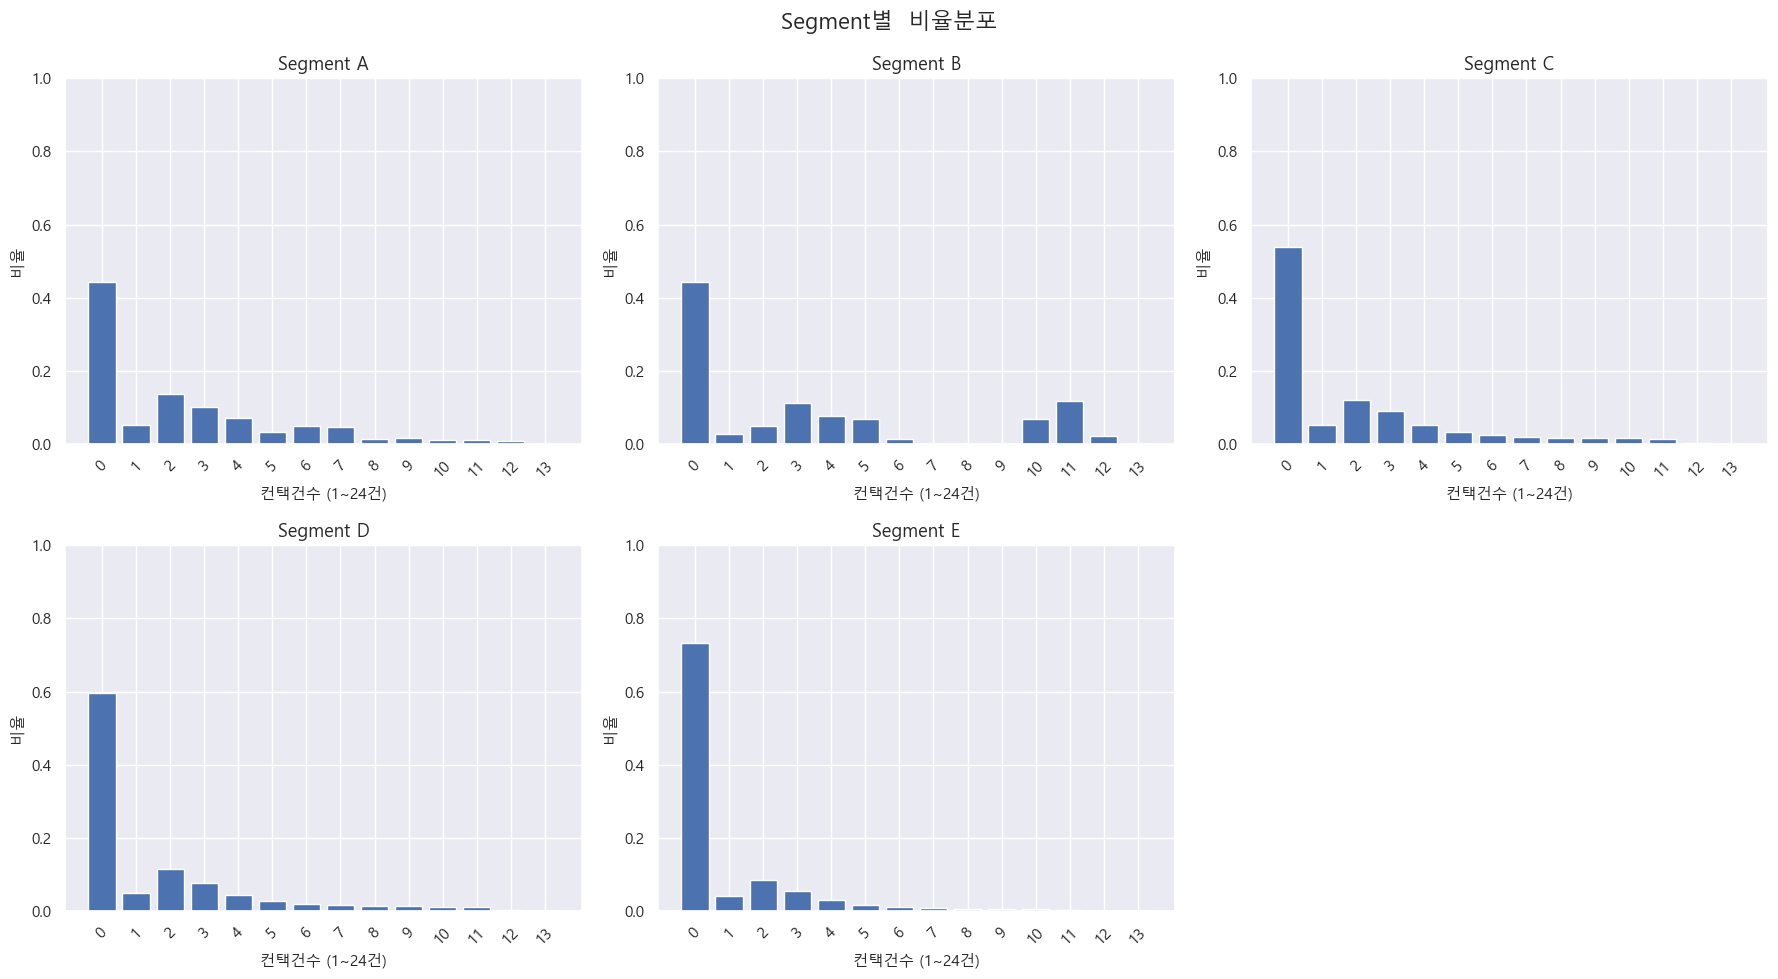

In [53]:
# 보고 싶은 범위 설정하면됨
tm_contact_ratio_range = tm_contact_ratio.loc[:, 0:63]

# 막대그래프 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

segments = tm_contact_ratio_range.index.tolist()

for i, seg in enumerate(segments):
    axes[i].bar(tm_contact_ratio_range.columns.astype(str), tm_contact_ratio_range.loc[seg])
    axes[i].set_title(f"Segment {seg}", fontsize=13)
    axes[i].set_xlabel("컨택건수 (1~24건)", fontsize=11)
    axes[i].set_ylabel("비율", fontsize=11)
    axes[i].set_ylim(0, 1)  # Y축 고정
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, axis='y')

# 빈 subplot 제거 (6번째)
fig.delaxes(axes[-1])

# 전체 타이틀
fig.suptitle("Segment별  비율분포", fontsize=16)
plt.tight_layout()
plt.show()


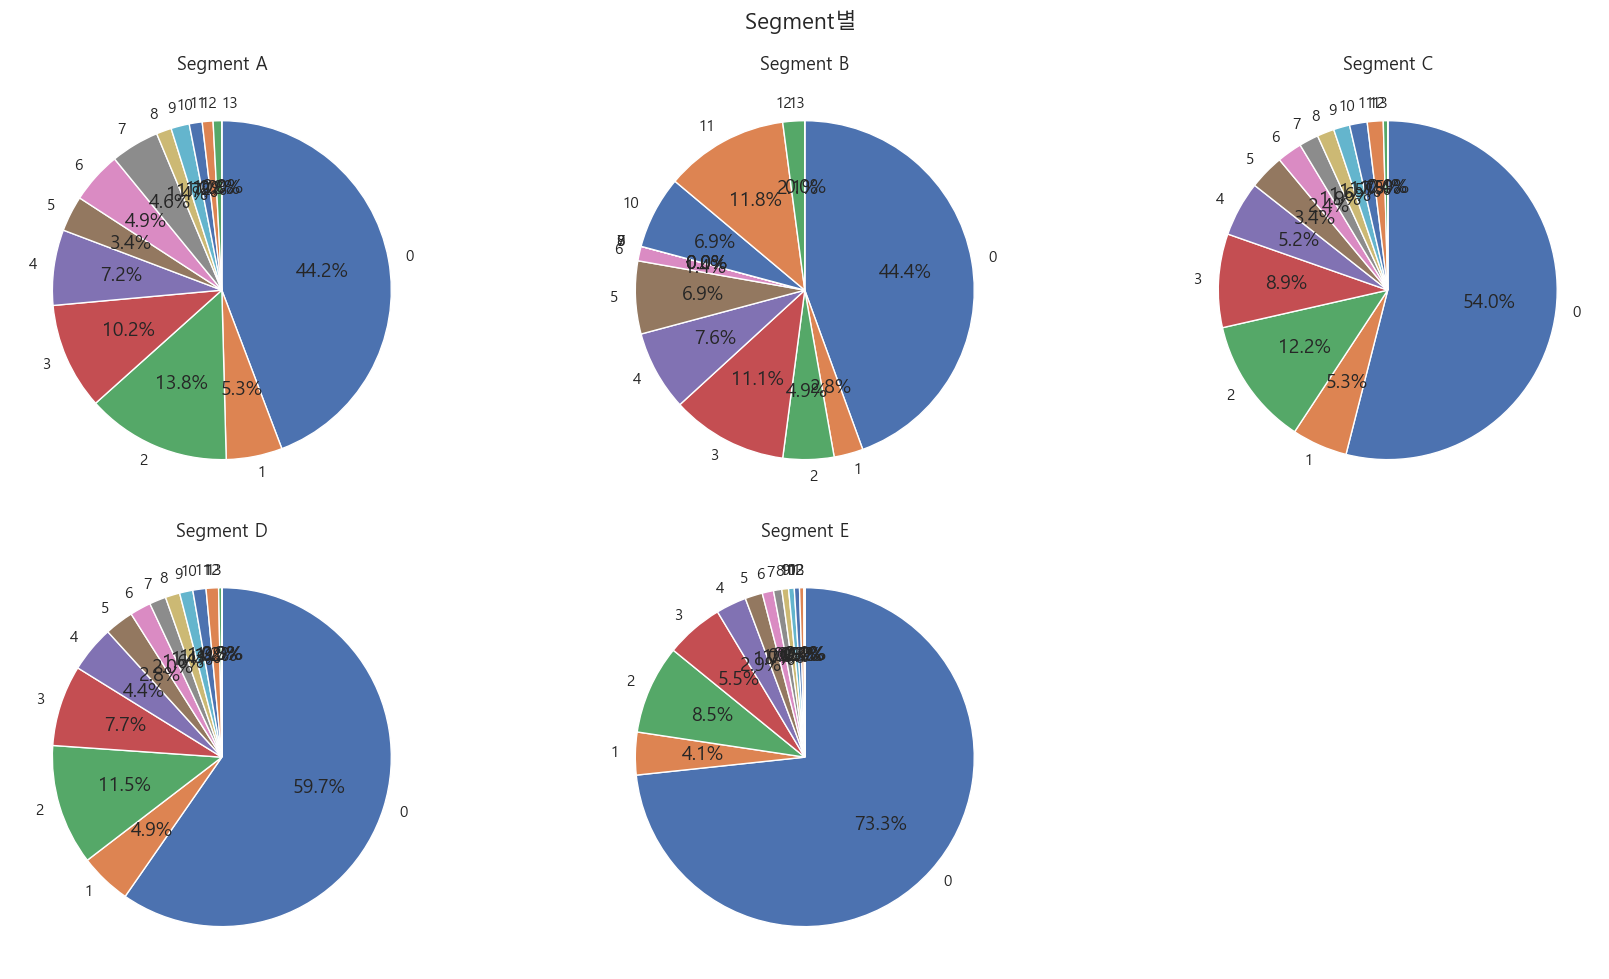

In [54]:
# 0건 제외한 1~16건 컬럼만 추출
tm_contact_ratio_range = tm_contact_ratio.loc[:, 0:63]

# 파이차트 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

segments = tm_contact_ratio_range.index.tolist()

for i, seg in enumerate(segments):
    data = tm_contact_ratio_range.loc[seg]
    axes[i].pie(
        data,
        labels=data.index.astype(str),
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False
    )
    axes[i].set_title(f"Segment {seg}", fontsize=13)

# 빈 subplot 제거 (6번째)
fig.delaxes(axes[-1])

# 전체 타이틀
fig.suptitle("Segment별 ", fontsize=16)
plt.tight_layout()
plt.show()

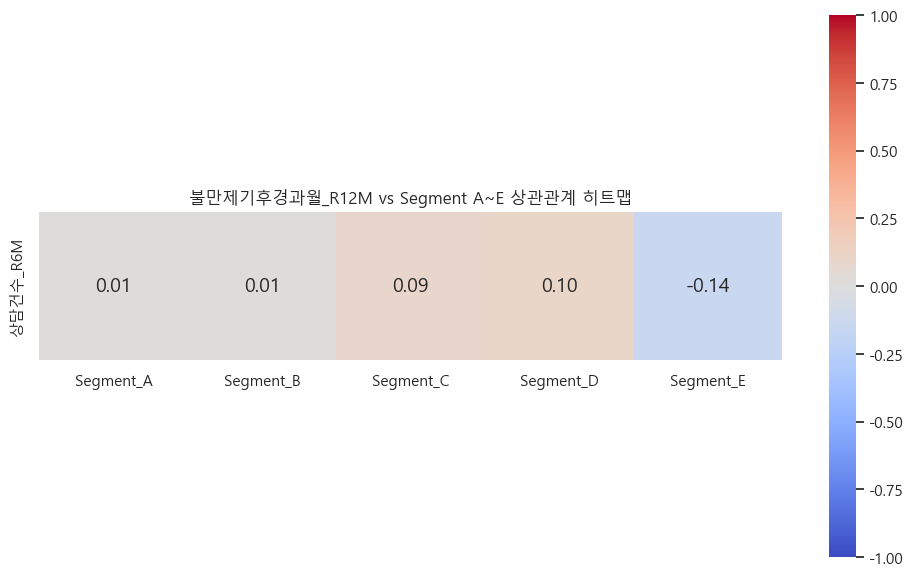

In [57]:
# 컨택건수_채권 관련 수치형 컬럼 리스트
bond_columns = [
    "상담건수_R6M"
]

# Segment를 원-핫 인코딩
segment_dummies = pd.get_dummies(df1["Segment"], prefix="Segment")

# 인코딩된 세그먼트와 홈페이지 컬럼만 추출
df_encoded = pd.concat([df1[bond_columns], segment_dummies], axis=1)

# 상관관계 계산
corr_matrix = df_encoded.corr()

# 히트맵 시각화 (홈페이지 컬럼 vs Segment 컬럼만 표시)
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix.loc[bond_columns, segment_dummies.columns],
    annot=True, cmap="coolwarm", fmt=".2f", square=True, vmax=1, vmin=-1
)
plt.title("불만제기후경과월_R12M vs Segment A~E 상관관계 히트맵")
plt.tight_layout()
plt.show()

### 결과해석

## 1. 📞 상담건수_B0M 세그먼트별 분포 해석

최근 1개월 내 상담 건수(0, 2, 3회)에 대한 세그먼트별 비율 분포는 다음과 같다.

| Segment | 0회 | 2회 | 3회 |
|---------|------|------|------|
| A       | 90.7% | 9.2%  | 0.1%  |
| B       | 79.9% | 20.1% | 0.0%  |
| C       | 91.5% | 8.5%  | 0.02% |
| D       | 92.8% | 7.2%  | 0.02% |
| E       | 96.2% | 3.8%  | 0.01% |

### 📌 주요 해석

- **전반적으로 상담 건수가 '0회'인 고객이 매우 높은 비중**을 차지함 (90% 이상인 그룹도 다수).
- **Segment B**는 타 세그먼트에 비해 **상담 경험이 있는 고객 비율이 가장 높음** (약 20.1%가 2회 상담).
- **Segment E**는 **상담 경험이 거의 없는 그룹**으로, **가장 자율적이거나 무관심한 고객일 수 있음**.
- **Segment A와 C**는 상담 경험이 적으면서도 비교적 평균적인 분포를 보이며, **평균 고객군에 가까움**.
- **Segment D**도 유사하게 상담 비율이 낮으나 일부 상담 경험이 있는 고객 존재.

### 🧭 인사이트 요약

- **상담 이력 비율**: `B > A ≈ C ≈ D > E`
- **고객 유형 분류**:
  - Segment B: **상담 활발 고객군** → 상담 품질 관리 필요
  - Segment E: **비상담·비반응 고객군** → **주의 대상** 또는 충성도 낮을 가능성
  - 나머지(A, C, D): 일반적인 범위 내 고객군


## 2. 📞 상담건수_R6M 세그먼트별 분포 해석

최근 6개월간의 총 상담 건수(0~13회) 비율 분포를 보면 다음과 같은 경향이 나타난다:

| Segment | 0회 (%) | 1~3회 (%) | 4~6회 (%) | 7회 이상 (%) |
|---------|---------|-----------|-----------|---------------|
| A       | 44.2%   | 29.8%     | 11.4%     | 14.6%         |
| B       | 44.4%   | 23.7%     | 8.4%      | 23.5%         |
| C       | 54.0%   | 22.3%     | 9.2%      | 14.5%         |
| D       | 59.7%   | 20.1%     | 7.2%      | 13.0%         |
| E       | 73.3%   | 18.0%     | 4.6%      | 4.1%          |

> ※ "1~3회"는 1~3회 상담 건수의 합, "4~6회"는 4~6회 합산, "7회 이상"은 7회 초과 값 합산 기준

### 📌 주요 해석

- **상담 경험이 전혀 없는 고객 비율(0회)**:  
  - Segment **E**가 가장 높고 (73.3%), **A, B**는 44% 수준.
  - **E세그먼트는 비상담·비응답 고객층**으로 해석 가능.

- **상담을 1~3회 한 경험이 있는 고객**:  
  - Segment A가 30%로 가장 높고, 나머지는 18~24% 수준에서 분포.

- **상담을 4~6회 한 중간활동층**:  
  - A, B, C 모두 약 8~11% 수준이나, Segment **E는 5% 미만**으로 활동이 매우 낮음.

- **상담을 7회 이상 한 적극적인 고객**:  
  - Segment B가 **가장 높은 반복상담 층 (약 24%)**
  - E는 **반복상담 비율이 가장 낮음 (약 4%)**.

### 🧭 인사이트 요약

- **상담활동 활발한 세그먼트**:  
  - **B > A > C > D > E**
  - 특히 **B세그먼트는 고반응, 고상담** 고객이 많음 → 민감/요구형 고객군.

- **상담 이력이 거의 없는 세그먼트**:  
  - Segment E → **가장 소극적 / 방관형 고객**으로 **별도 리마케팅 전략 필요**.

- **A는 평균 분포에 가까운 구성**으로 **보편적 고객층**을 대표함.

- **D는 절반 이상이 무상담이며, 전체적으로 반응은 낮지만 소수 반복상담층 존재.**


## 이용메뉴건수 (ARS, IB)

In [65]:
# 분석 대상 컬럼
menu_columns = [
    "이용메뉴건수_ARS_B0M",
    "이용메뉴건수_IB_B0M",
    "이용메뉴건수_IB_R6M"
]

In [67]:
# 데이터 타입 확인
df1[menu_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 3 columns):
 #   Column          Dtype
---  ------          -----
 0   이용메뉴건수_ARS_B0M  int64
 1   이용메뉴건수_IB_B0M   int64
 2   이용메뉴건수_IB_R6M   int64
dtypes: int64(3)
memory usage: 54.9 MB


In [69]:

# Segment A~E 필터링
df1_ab = df1[df1["Segment"].isin(['A', 'B', 'C', 'D', 'E'])]

# 세그먼트별 평균값 계산 (전치해서 보기 좋게)
ab_menu_mean = df1_ab.groupby("Segment")[menu_columns].mean().T

# 결과 출력
display(ab_menu_mean)

Segment,A,B,C,D,E
이용메뉴건수_ARS_B0M,0.719136,1.250000,0.699295,0.555389,0.251285
이용메뉴건수_IB_B0M,0.069959,0.138889,0.062207,0.052809,0.028252
이용메뉴건수_IB_R6M,1.289095,1.750000,1.039274,0.891339,0.539781


### 개별확인용

In [90]:
df1['이용메뉴건수_IB_R6M'].value_counts().sort_index()

이용메뉴건수_IB_R6M
0    1722681
1     214329
2     259492
3     110172
4      53512
5      33874
6       5940
Name: count, dtype: int64

In [92]:
# 세그먼트별 '컬럼' 값 분포 확인
tm_contact_dist = (
    df1.groupby("Segment")["이용메뉴건수_IB_R6M"]
    .value_counts()
    .sort_index()  # 값 기준 정렬
    .unstack(fill_value=0)  # 보기 좋게 pivot
)

# 결과 출력
display(tm_contact_dist)

# Segment별 비율 테이블 (열 기준 normalize)
tm_contact_ratio = tm_contact_dist.div(tm_contact_dist.sum(axis=1), axis=0)
display(tm_contact_ratio)

이용메뉴건수_IB_R6M,0,1,2,3,4,5,6
Segment,,,,,,,
A,468,129,164,96,78,26,11
B,69,8,16,20,6,22,3
C,71873,15718,19564,9849,5509,4290,787
D,214948,39335,48766,22665,12825,9087,1616
E,1435323,159139,190982,77542,35094,20449,3523


이용메뉴건수_IB_R6M,0,1,2,3,4,5,6
Segment,,,,,,,
A,0.48148,0.13272,0.16872,0.09877,0.08025,0.02675,0.01132
B,0.47917,0.05556,0.11111,0.13889,0.04167,0.15278,0.02083
C,0.56331,0.12319,0.15333,0.07719,0.04318,0.03362,0.00617
D,0.61547,0.11263,0.13963,0.06490,0.03672,0.02602,0.00463
E,0.74677,0.08280,0.09936,0.04034,0.01826,0.01064,0.00183


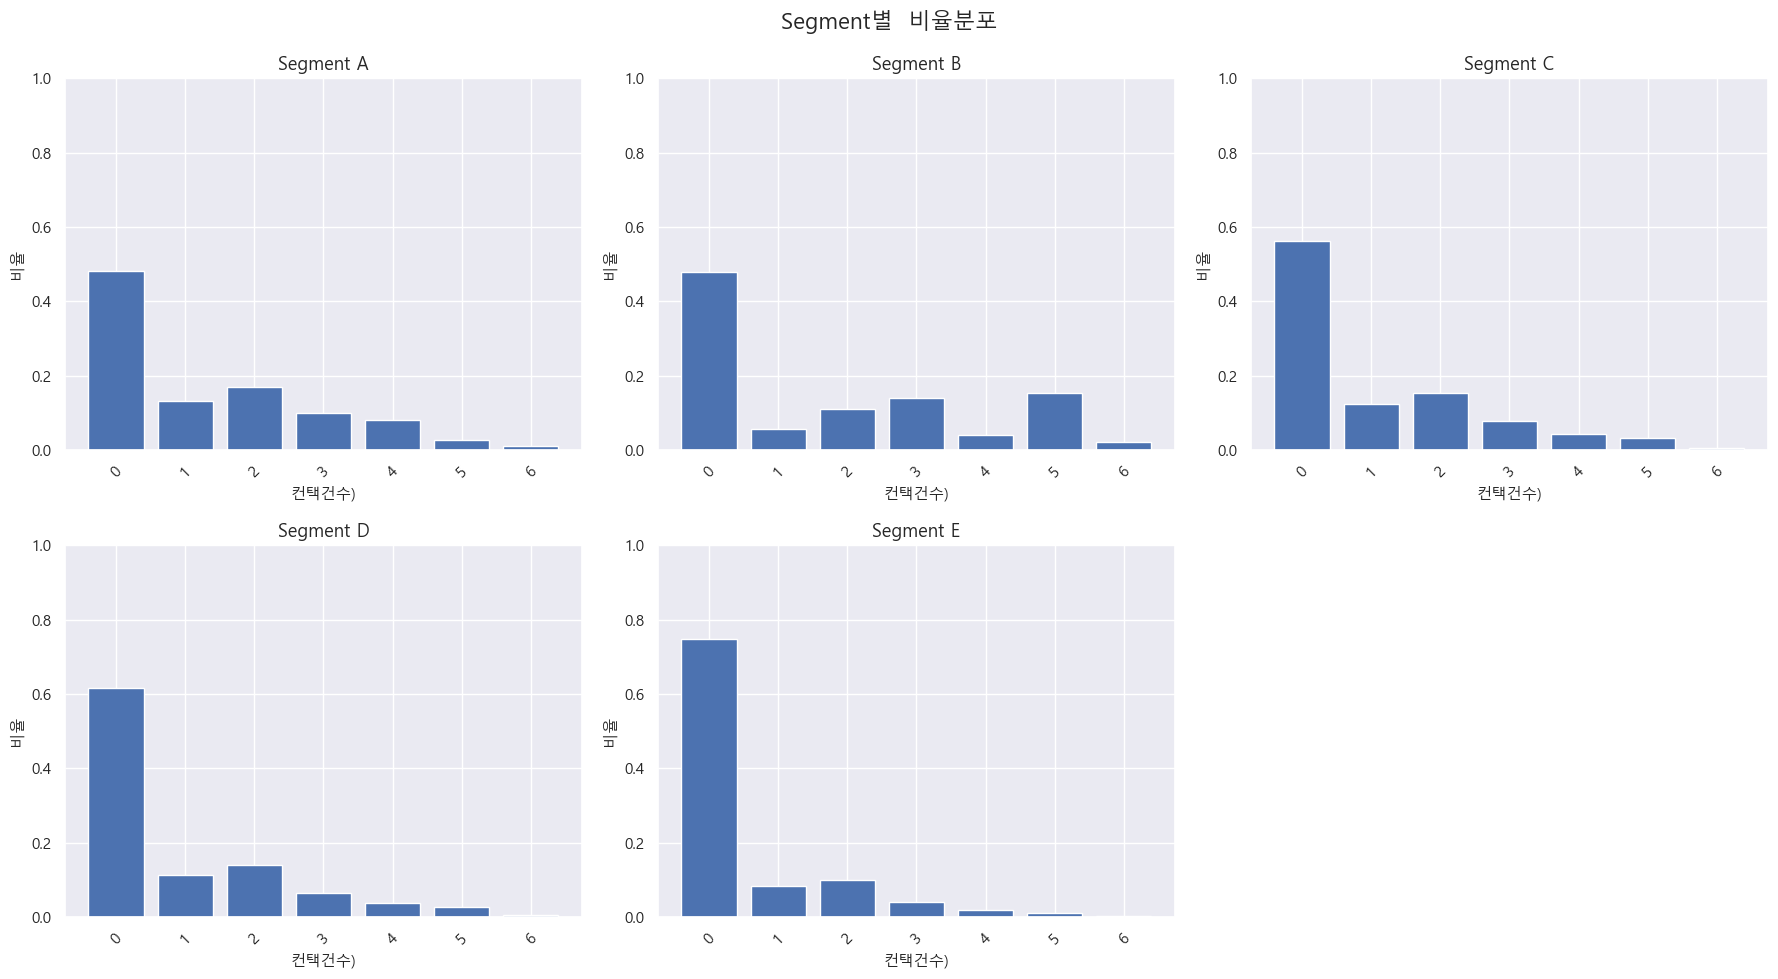

In [94]:
# 보고 싶은 범위 설정하면됨
tm_contact_ratio_range = tm_contact_ratio.loc[:, 0:63]

# 막대그래프 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

segments = tm_contact_ratio_range.index.tolist()

for i, seg in enumerate(segments):
    axes[i].bar(tm_contact_ratio_range.columns.astype(str), tm_contact_ratio_range.loc[seg])
    axes[i].set_title(f"Segment {seg}", fontsize=13)
    axes[i].set_xlabel("컨택건수)", fontsize=11)
    axes[i].set_ylabel("비율", fontsize=11)
    axes[i].set_ylim(0, 1)  # Y축 고정
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, axis='y')

# 빈 subplot 제거 (6번째)
fig.delaxes(axes[-1])

# 전체 타이틀
fig.suptitle("Segment별  비율분포", fontsize=16)
plt.tight_layout()
plt.show()


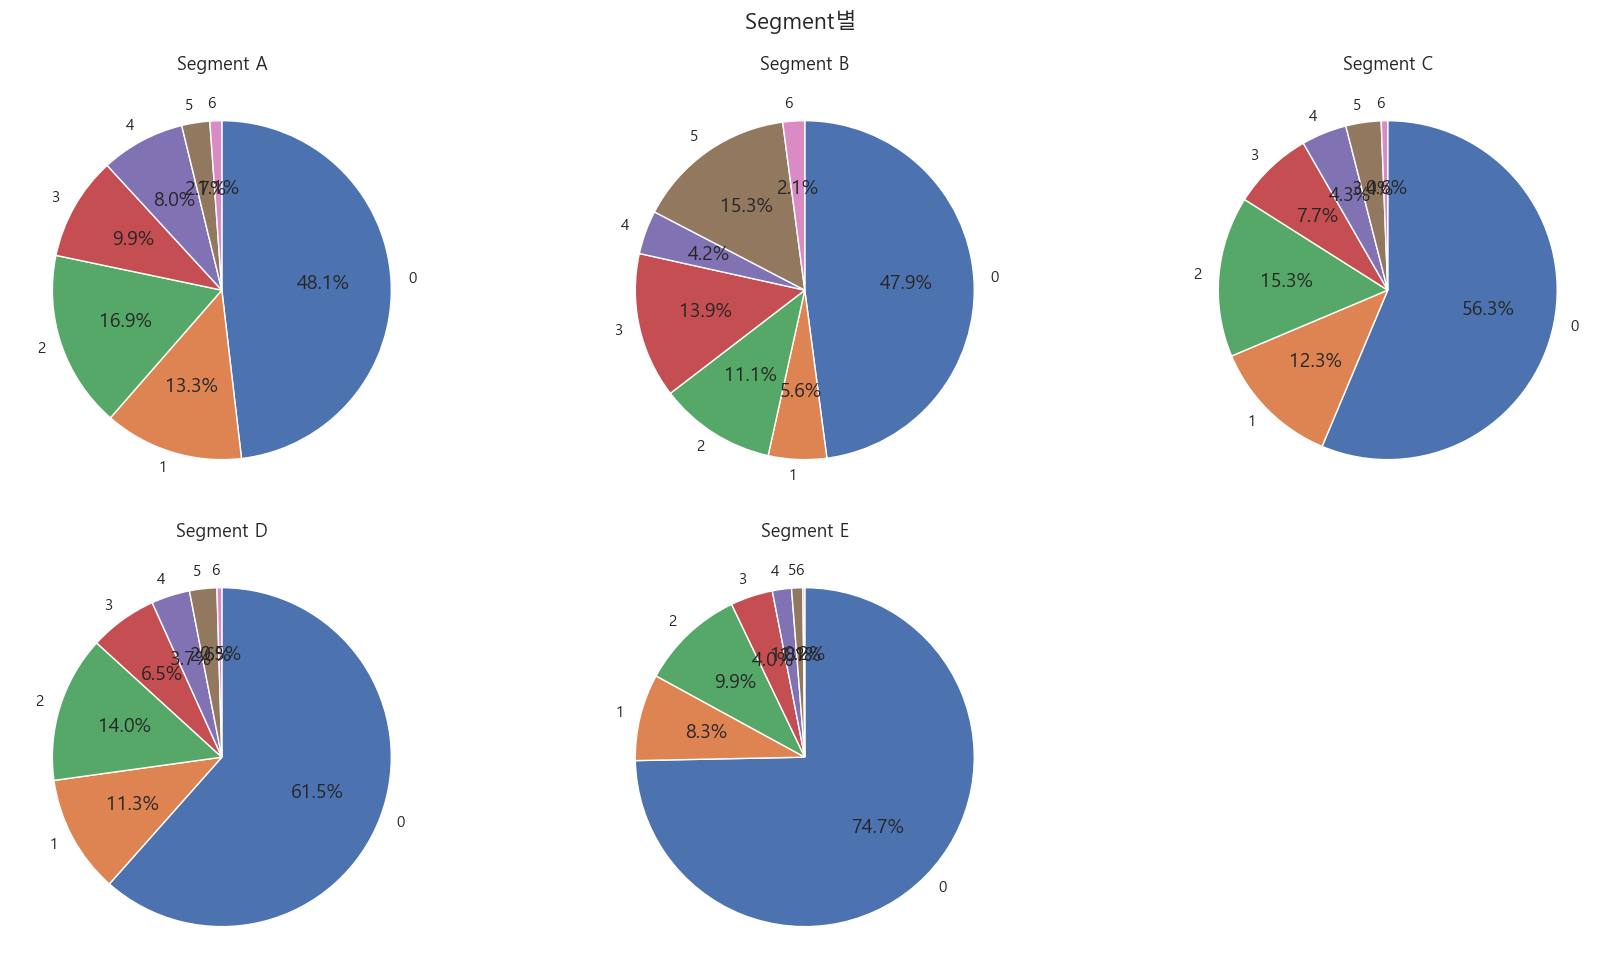

In [95]:
# 0건 제외한 1~16건 컬럼만 추출
tm_contact_ratio_range = tm_contact_ratio.loc[:, 0:63]

# 파이차트 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

segments = tm_contact_ratio_range.index.tolist()

for i, seg in enumerate(segments):
    data = tm_contact_ratio_range.loc[seg]
    axes[i].pie(
        data,
        labels=data.index.astype(str),
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False
    )
    axes[i].set_title(f"Segment {seg}", fontsize=13)

# 빈 subplot 제거 (6번째)
fig.delaxes(axes[-1])

# 전체 타이틀
fig.suptitle("Segment별 ", fontsize=16)
plt.tight_layout()
plt.show()

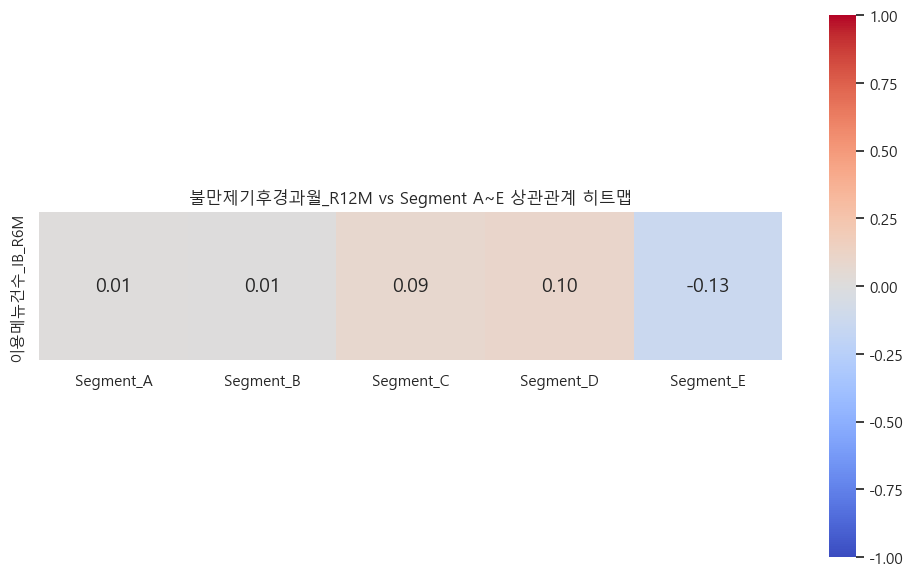

In [98]:
# 컨택건수_채권 관련 수치형 컬럼 리스트
bond_columns = [
    "이용메뉴건수_IB_R6M"
]

# Segment를 원-핫 인코딩
segment_dummies = pd.get_dummies(df1["Segment"], prefix="Segment")

# 인코딩된 세그먼트와 홈페이지 컬럼만 추출
df_encoded = pd.concat([df1[bond_columns], segment_dummies], axis=1)

# 상관관계 계산
corr_matrix = df_encoded.corr()

# 히트맵 시각화 (홈페이지 컬럼 vs Segment 컬럼만 표시)
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix.loc[bond_columns, segment_dummies.columns],
    annot=True, cmap="coolwarm", fmt=".2f", square=True, vmax=1, vmin=-1
)
plt.title("불만제기후경과월_R12M vs Segment A~E 상관관계 히트맵")
plt.tight_layout()
plt.show()

### 결과해석 모음

## 1. ☎️ 이용메뉴건수_ARS_B0M 세그먼트별 분포 해석

최근 1개월(B0M) 기준, 고객이 ARS(자동응답시스템)를 통해 이용한 메뉴 수 분포 (0회 ~ 7회)입니다.

| Segment | 0회 (%) | 4회 (%) | 5회 (%) | 6회 (%) | 7회 (%) |
|---------|--------|--------|--------|--------|--------|
| A       | 86.1   | 1.2    | 9.0    | 3.7    | 0.0    |
| B       | 77.1   | 1.4    | 9.7    | 11.8   | 0.0    |
| C       | 86.7   | 0.5    | 8.9    | 3.9    | 0.001  |
| D       | 89.4   | 0.2    | 8.0    | 2.5    | 0.0    |
| E       | 95.1   | 0.1    | 4.2    | 0.6    | 0.0    |

### 📌 주요 해석

- **0회 이용자 비율**:
  - 전 세그먼트에서 **절대다수는 ARS를 이용하지 않음**
  - 특히 **E 세그먼트는 95% 이상이 0회 이용**, 가장 낮은 사용성

- **반복 이용(5~6회)**:
  - **B 세그먼트에서 상대적으로 ARS 이용이 활발**  
    → 5회 이상 이용자가 전체의 20% 가량 (5회 9.7% + 6회 11.8%)

- **A, C 세그먼트는 ARS 이용이 중간 수준**, D는 소폭 낮음

- **E 세그먼트는 ARS 채널을 거의 사용하지 않음**, 단순 소비 또는 기술 친화도 낮은 고객군 가능성

### 🧭 인사이트 요약

- **ARS 채널 친화도 높은 세그먼트**:  
  → **B > A ≒ C > D > E**

- **E 세그먼트**는 **비이용층이 압도적** → 이 채널을 통한 접근 효과 낮을 수 있음

- **B 세그먼트**는 ARS 채널에서의 메뉴 이동이 많아,  
  → **IVR 사용자 기반 상품 추천 또는 메뉴 구성 개선 전략**에 유리


## 2. 📞 이용메뉴건수_IB_R6M 세그먼트별 분포 해석

최근 6개월간 IB(전화문의 등) 채널 내 메뉴 이용 횟수 분포를 나타냅니다. 0회부터 6회 이상까지의 이용 빈도가 집계되어 있습니다.

| Segment | 0회 (%) | 1회 (%) | 2회 (%) | 3회 (%) | 4회 (%) | 5회 (%) | 6회 (%) |
|---------|--------|--------|--------|--------|--------|--------|--------|
| A       | 48.1   | 13.3   | 16.9   | 9.9    | 8.0    | 2.7    | 1.1    |
| B       | 48.0   | 5.6    | 11.1   | 13.9   | 4.2    | 15.3   | 2.1    |
| C       | 56.3   | 12.3   | 15.3   | 7.8    | 4.3    | 3.4    | 0.7    |
| D       | 61.5   | 11.3   | 14.0   | 6.5    | 3.8    | 2.6    | 0.4    |
| E       | 74.7   | 8.3    | 10.0   | 4.0    | 1.8    | 1.0    | 0.2    |

### 📌 핵심 해석

- **0회 이용자 비율 (비이용층)**:
  - **E 세그먼트는 74.7%가 메뉴 이용 경험 없음**
  - **D, C도 60% 전후로 비이용 비중이 높음**
  - 상대적으로 **A, B 세그먼트는 이용 경험이 많은 편**

- **1~3회 이용 (경험층)**:
  - **A 세그먼트**는 **1~3회 이용자**가 40% 이상으로 가장 고르게 분포
  - **B 세그먼트는 3회 이상 다회 이용자의 비중이 크며**, 5회(15.3%) 이상에서 두드러짐

- **반복 이용층 (4회 이상)**:
  - **B 세그먼트는 반복 이용층이 21.5%로 가장 두드러짐**
  - A 세그먼트는 고르게 분포되어 있으나 반복 비중은 낮음
  - **E 세그먼트는 거의 이용하지 않음**

### 🧭 인사이트 요약

- **IB 메뉴를 적극 활용하는 세그먼트**:
  - **B 세그먼트 > A > C > D > E** 순
  - 특히 **B는 반복 이용 비중이 높아**, **문의/상담 중심 고객**일 가능성

- **이용 비중이 낮은 세그먼트**:
  - **E는 비이용 비율이 매우 높고 반복 이용 거의 없음**
  - 자동화 시스템에 관심이 낮거나, 타 채널 선호 가능성

- **C, D는 중간층으로, 개선된 유입 유도 전략 타깃 가능**

---

## 개별확인용 - 인덱스값 문자열 컬럼

In [101]:
suspect_columns = [
    "이용메뉴건수_ARS_R6M",
    
]

# 각 컬럼별 고유값 출력
for col in suspect_columns:
    print(f"\n[ {col} ]")
    print(df1[col].value_counts(dropna=False))


[ 이용메뉴건수_ARS_R6M ]
이용메뉴건수_ARS_R6M
1회 이상     2313787
10회 이상      70027
30회 이상      10172
20회 이상       6014
Name: count, dtype: int64


In [106]:
# 세그먼트별 '컬럼' 값 분포 확인
tm_contact_dist = (
    df1.groupby("Segment")["이용메뉴건수_ARS_R6M"]
    .value_counts()
    .sort_index()  # 값 기준 정렬
    .unstack(fill_value=0)  # 보기 좋게 pivot
)
# Segment별 비율 테이블 (열 기준 normalize)
tm_contact_ratio = tm_contact_dist.div(tm_contact_dist.sum(axis=1), axis=0)

# 원하는 열 순서로 재정렬 -----------값 범위 컬럼에 따라 다르니 확인
ordered_columns = ["1회 이상", "10회 이상", "20회 이상", "30회 이상"]
# ordered_columns = ["1회 이상", "10회 이상", "20회 이상", "30회 이상", "40회 이상"]
# ordered_columns = ["1회 이상", "10회 이상", "20회 이상", "30회 이상", "40회 이상", "50회 이상", "60회 이상", "70회 이상", "80회 이상"]
# 순서 변경 적용
tm_contact_dist_ordered = tm_contact_dist.reindex(columns=ordered_columns)
tm_contact_ratio_ordered = tm_contact_ratio.reindex(columns=ordered_columns)

# 출력
display(tm_contact_dist_ordered)
display(tm_contact_ratio_ordered)

이용메뉴건수_ARS_R6M,1회 이상,10회 이상,20회 이상,30회 이상
Segment,,,,
A,888,69,5,10
B,115,24,0,5
C,116009,9394,631,1556
D,324934,19676,1530,3102
E,1871841,40864,3848,5499


이용메뉴건수_ARS_R6M,1회 이상,10회 이상,20회 이상,30회 이상
Segment,,,,
A,0.91358,0.07099,0.00514,0.01029
B,0.79861,0.16667,0.00000,0.03472
C,0.90923,0.07363,0.00495,0.01220
D,0.93040,0.05634,0.00438,0.00888
E,0.97388,0.02126,0.00200,0.00286


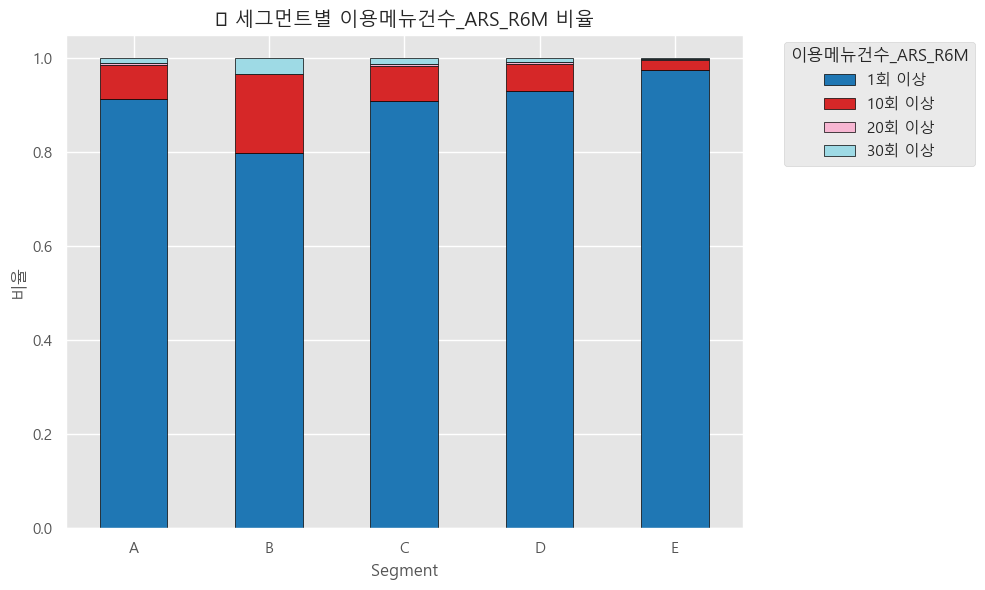

In [108]:
# 막대그래프
import matplotlib.pyplot as plt

# 스타일 설정 (선택)
plt.style.use("ggplot")

# 데이터 (이미 준비된 비율 테이블 사용)
plot_data = tm_contact_ratio_ordered.copy()

# 시각화
plot_data.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='tab20',
    edgecolor='black'
)

# 라벨 및 제목
plt.title("📊 세그먼트별 이용메뉴건수_ARS_R6M 비율", fontsize=14)
plt.xlabel("Segment", fontsize=12)
plt.ylabel("비율", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="이용메뉴건수_ARS_R6M", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

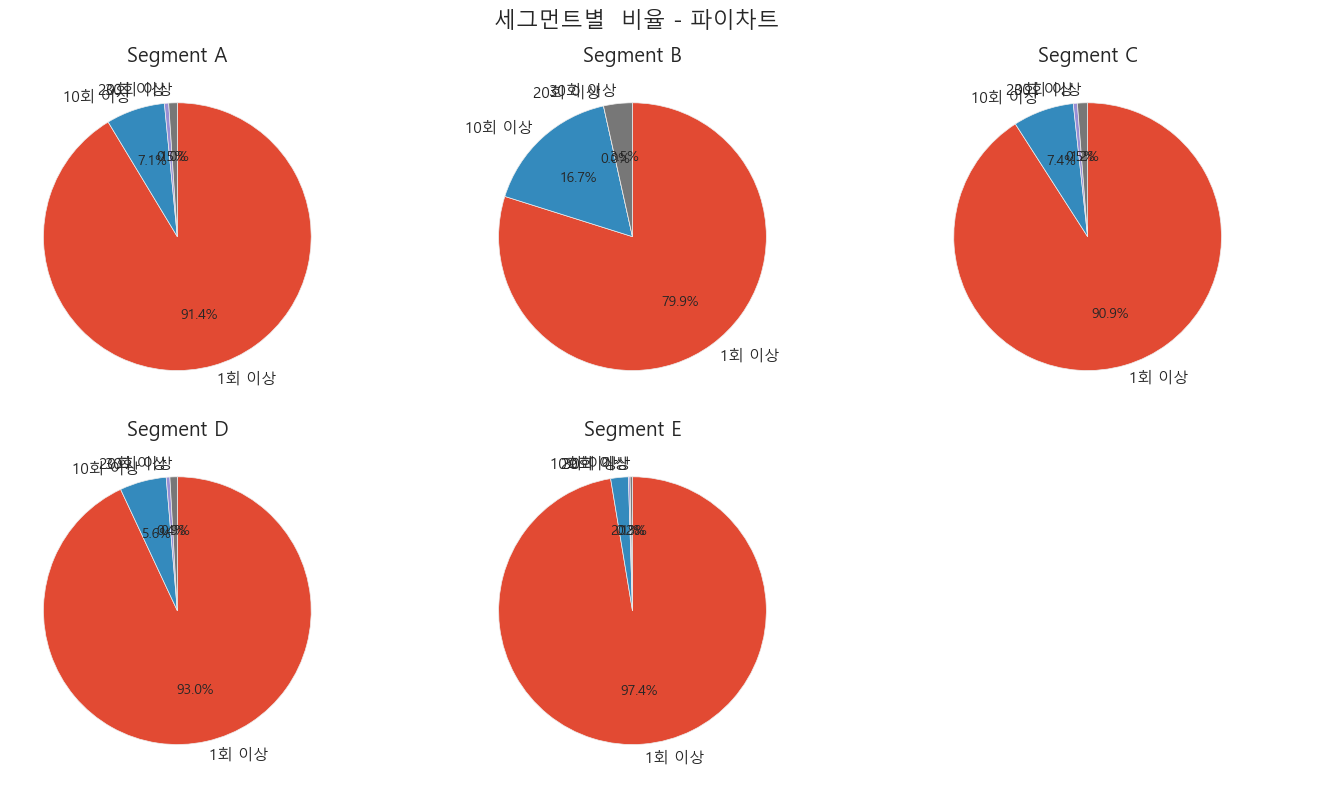

In [110]:
# 파이차트
import matplotlib.pyplot as plt

# 데이터 복사
plot_data = tm_contact_ratio_ordered.copy()

# 세그먼트 리스트
segments = plot_data.index.tolist()

# 서브플롯 설정 (2행 3열)
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

# 파이차트 반복 생성
for i, seg in enumerate(segments):
    axes[i].pie(
        plot_data.loc[seg],
        labels=plot_data.columns,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False
    )
    axes[i].set_title(f"Segment {seg}")

# 마지막 빈 subplot 제거 (5개만 사용)
for j in range(len(segments), len(axes)):
    axes[j].axis('off')

# 전체 타이틀
plt.suptitle(" 세그먼트별  비율 - 파이차트", fontsize=16)
plt.tight_layout()
plt.show()

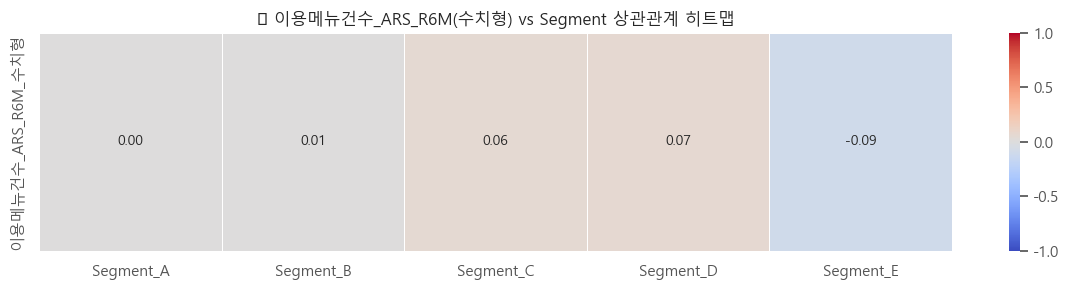

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 매핑 딕셔너리 정의 -----------값 확인하기
mapping = {
    "1회 이상": 1,
    "10회 이상": 10,
    "20회 이상": 20,
    "30회 이상": 30 
}

# mapping = {
#     "1회 이상": 1,
#     "10회 이상": 10,
#     "20회 이상": 20,
#     "30회 이상": 30,
#     "40회 이상": 40
# }

# mapping = {
#     "1회 이상": 1,
#     "10회 이상": 10,
#     "20회 이상": 20,
#     "30회 이상": 30,
#     "40회 이상": 40,
#     "50회 이상": 50,
#     "60회 이상": 60,
#     "70회 이상": 70,
#     "80회 이상": 80   
# }
# 2. 매핑 적용 → 새 컬럼 생성 (또는 덮어쓰기)
df1["이용메뉴건수_ARS_R6M_수치형"] = df1["이용메뉴건수_ARS_R6M"].map(mapping)

# 3. 필요한 컬럼만 추출
df_corr = df1[["이용메뉴건수_ARS_R6M_수치형", "Segment"]].dropna()

# 4. Segment 원-핫 인코딩
segment_dummies = pd.get_dummies(df_corr["Segment"], prefix="Segment")

# 5. 병합
df_corr_final = pd.concat([df_corr[["이용메뉴건수_ARS_R6M_수치형"]], segment_dummies], axis=1)

# 6. 상관관계 계산
corr_matrix = df_corr_final.corr()

# 7. 히트맵 시각화
plt.figure(figsize=(12, 3))  # 🔹 크기 줄임
sns.heatmap(
    corr_matrix.loc[["이용메뉴건수_ARS_R6M_수치형"], segment_dummies.columns],
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    vmax=1,     # 🔹 상관계수 최대값
    vmin=-1     # 🔹 상관계수 최소값
)
plt.title("🧭 이용메뉴건수_ARS_R6M(수치형) vs Segment 상관관계 히트맵", fontsize=12)
plt.tight_layout()
plt.show()

## ☎️ 이용메뉴건수_ARS_R6M 세그먼트별 분포 해석

최근 6개월간 ARS(자동응답 시스템)를 통해 메뉴를 이용한 건수에 대한 비율입니다. **1회 이상**, **10회 이상**, **20회 이상**, **30회 이상** 이용자 비율을 세그먼트별로 확인할 수 있습니다.

| Segment | 1회 이상 (%) | 10회 이상 (%) | 20회 이상 (%) | 30회 이상 (%) |
|---------|--------------|----------------|----------------|----------------|
| A       | 91.4         | 7.1            | 0.5            | 1.0            |
| B       | 79.9         | 16.7           | 0.0            | 3.5            |
| C       | 90.9         | 7.4            | 0.5            | 1.2            |
| D       | 93.4         | 5.6            | 0.4            | 0.9            |
| E       | 97.4         | 2.1            | 0.2            | 0.3            |

### ✅ 주요 해석 요약

- **1회 이상 이용자 비율 (ARS 이용 경험자)**:
  - **모든 세그먼트에서 80% 이상이 ARS를 최소 1회 이상 이용**
  - **E 세그먼트는 거의 전원이(97.4%) ARS 이용 경험이 있음**

- **반복 이용자 비율 (10회 이상)**:
  - **B 세그먼트에서 반복 이용률이 가장 높음** (16.7%)
  - A, C, D는 5~7%대로 유사
  - **E 세그먼트는 반복 이용 비율이 가장 낮음 (2.1%)**

- **고빈도 이용자 (20회 이상 & 30회 이상)**:
  - **B 세그먼트는 30회 이상 비율이 3.5%로 가장 높음**, 일부 핵심 고객이 집중 사용 가능성
  - A, C, D는 모두 유사하게 **30회 이상 비율은 1% 내외**
  - **E 세그먼트는 전체적으로 반복 이용률이 매우 낮음**

### 🔍 종합 인사이트

- **ARS 메뉴를 반복적으로 활용하는 충성 고객층은 B 세그먼트에 집중**
  - 마케팅 캠페인 및 서비스 고도화 타깃 가능

- **E 세그먼트는 대부분 1~2회 수준의 단발 이용에 머무름**
  - 메뉴 진입 유도보다는 타 채널 안내 전략 필요

- **A, C, D 세그먼트는 전체적으로 고른 이용 분포**
  - 기능 안내 또는 단순화 전략 적용 시 전환률 기대 가능
